In [ ]:
from google.colab import drive # this is how I loaded the data in today. run this code and create a shortcut in your google drive for this folder 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
import pandas as pd

training = pd.read_csv("/content/drive/MyDrive/ML2021/Project/Train-Test-Validation-final-no-impute/training1_norm.csv")
training.info()
testing = pd.read_csv("/content/drive/MyDrive/ML2021/Project/Train-Test-Validation-final-no-impute/testing1_norm.csv")
testing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Columns: 327 entries, subject_id to site_onset5
dtypes: float64(306), int64(21)
memory usage: 4.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Columns: 327 entries, subject_id to site_onset5
dtypes: float64(306), int64(21)
memory usage: 1.1 MB


In [ ]:
training.head()

,subject_id,slope_following_9_months,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,553099,-0.887366,0.500000,1,1,0,0,0,1,0.42,0.579570,0,0.311475,0.793103,0.161765,0.810811,0.518581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949141,0,0,0,0,0,0,0,0,0,0,NaN,0.131550,...,0.375,0.250,0.285714,0.333333,0.142857,0.250,0.114094,0.148515,NaN,0.227273,NaN,NaN,NaN,NaN,NaN,0.654867,0.641104,0.609898,0.642481,0.50,0.418354,0.266667,0.380435,0.416282,0.074076,0.871430,0.053028,0.149382,0.053028,0.078949,0.333333,0.145698,0.069307,0.257669,5.534275e-05,0.054815,0.523265,1,0,0
1,8471,-0.954460,0.241935,1,1,0,0,0,1,0.50,0.192937,0,0.196721,0.344828,0.985294,0.297297,0.407484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0.794043,0.073579,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.068663,0.156000,0.556980,0.244755,NaN,0.772637,0.782950,1.0,0.0,0.405605,0.243865,0.231441,0.302787,0.75,0.264533,0.266667,0.989130,0.099718,0.205413,0.860476,0.051850,0.153053,0.051800,0.081122,0.666667,0.147295,0.277228,0.932515,1.361063e-05,0.024202,0.498525,0,1,0
2,534458,-0.521771,0.209677,1,1,0,0,0,1,NaN,NaN,0,0.196721,0.137931,0.691176,0.243243,0.500952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888364,0,0,0,0,0,0,0,0,0,0,NaN,0.144928,...,0.000,0.000,0.571429,0.833333,0.571429,0.625,NaN,NaN,NaN,0.249680,0.055572,0.737405,0.750310,NaN,NaN,0.256637,0.164110,0.155750,0.239518,0.75,0.209667,0.266667,0.771739,0.062065,0.137626,0.870131,0.053071,0.154218,0.048440,0.082086,0.666667,0.149962,0.168317,0.699387,7.792117e-06,0.022067,0.490034,1,0,0
3,225766,-0.454279,0.661290,0,1,0,0,0,1,0.34,0.298746,0,0.196721,0.379310,0.602941,0.486486,0.573389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0.393617,0.084727,...,0.375,0.375,0.285714,0.000000,0.285714,0.375,0.074858,0.174714,0.474644,0.276224,NaN,0.753222,0.763024,1.0,0.0,0.238938,0.177914,0.168850,0.197590,0.50,0.129001,0.266667,0.706522,0.042658,0.113566,0.876597,0.052909,0.155239,0.052909,0.082078,0.333333,0.151473,0.306931,0.588957,6.350502e-06,0.018150,0.499859,0,1,0
4,161271,-0.457694,0.629032,1,1,0,0,0,0,NaN,NaN,0,0.196721,0.793103,0.985294,0.810811,0.585239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.851915,0.248606,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.070728,0.167229,0.529915,0.209790,NaN,0.722566,0.733044,0.0,0.0,0.438053,0.421779,0.400291,0.437986,0.75,0.381777,0.266667,0.989130,0.195373,0.059273,0.892856,0.052902,0.157299,0.052045,0.083081,0.666667,0.152717,0.297030,0.944785,7.293832e-07,0.004812,0.494093,1,0,0


In [ ]:
testing.head()

,subject_id,slope_following_9_months,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,312890,0.313780,0.306452,0,1,0,0,0,1,0.32,0.374308,0,0.196721,0.206897,0.558824,0.270270,0.440933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.248936,0.073021,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.075557,0.114181,0.528973,0.304252,NaN,0.773527,0.784462,1.0,0.0,0.261062,0.257669,0.244541,0.262867,0.50,0.171457,0.266667,0.673913,0.071697,0.036037,0.893950,0.052477,0.157539,0.052176,0.083122,0.333333,0.153398,0.336634,0.588957,4.765014e-07,0.001644,0.494298,0,1,0
1,38898,-0.187881,0.741935,1,1,0,0,0,1,0.48,0.544134,0,0.196721,0.724138,0.573529,0.810811,0.657658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.551064,0.157469,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.060403,0.182304,0.551440,0.189394,NaN,0.797048,0.806590,1.0,0.0,0.411504,0.421779,0.411936,0.419533,0.50,0.273351,0.266667,0.684783,0.179166,0.027364,0.908548,0.053942,0.157843,0.052518,0.083995,0.333333,0.155011,0.297030,0.570552,6.445188e-07,0.007782,0.492533,1,0,0
2,441498,0.127885,0.693548,1,1,0,0,0,0,0.70,0.464124,0,0.442623,0.827586,0.794118,0.891892,0.657658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873256,0,0,0,0,0,0,0,0,0,0,NaN,0.151616,...,0.375,0.375,0.285714,0.5,0.285714,0.375,0.070040,0.148515,0.511871,0.227273,0.048851,0.771104,0.781116,1.0,0.0,0.615044,0.638037,0.605531,0.629425,0.50,0.409863,0.266667,0.847826,0.399093,0.022255,0.902156,0.053819,0.157902,0.052584,0.083968,0.333333,0.154960,0.148515,0.570552,4.889238e-07,0.006751,0.493206,1,0,0
3,701123,-1.014556,0.677419,0,1,0,0,0,1,0.26,0.468007,0,0.196721,0.896552,0.397059,0.945946,0.667727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0.810213,0.084727,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.056718,0.191924,0.526144,0.227273,NaN,0.803994,0.818409,1.0,0.0,0.308260,0.282209,0.267831,0.290485,0.50,0.189419,0.266667,0.554348,0.087604,0.070294,0.881826,0.052779,0.155597,0.052779,0.082211,0.333333,0.151717,0.207921,0.441718,4.941326e-06,0.015238,0.500215,0,1,0
4,230653,-0.111490,0.274194,1,1,0,0,0,1,0.68,0.772435,0,0.622951,0.862069,0.911765,0.837838,0.525000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.768511,0.062152,...,0.500,0.500,0.285714,0.0,0.428571,0.500,0.056032,0.128713,0.474806,NaN,NaN,0.771853,0.781794,1.0,0.0,0.477876,0.463190,0.439592,0.481296,0.75,0.419334,0.266667,0.934783,0.235169,0.055813,0.892175,0.053469,0.156607,0.051127,0.083058,0.666667,0.152654,0.257426,0.865031,1.571287e-06,0.010466,0.493865,1,0,0


In [ ]:
train = training.drop(columns=['subject_id','slope_following_9_months'])
test = testing.drop(columns=['subject_id','slope_following_9_months'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Columns: 325 entries, Age to site_onset5
dtypes: float64(305), int64(20)
memory usage: 4.2 MB


In [ ]:
train.head()

,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,ALTSGPT_ValueMin,ALTSGPT_ValueMax,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,0.500000,1,1,0,0,0,1,0.42,0.579570,0,0.311475,0.793103,0.161765,0.810811,0.518581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949141,0,0,0,0,0,0,0,0,0,0,NaN,0.131550,0.362832,0.057839,...,0.375,0.250,0.285714,0.333333,0.142857,0.250,0.114094,0.148515,NaN,0.227273,NaN,NaN,NaN,NaN,NaN,0.654867,0.641104,0.609898,0.642481,0.50,0.418354,0.266667,0.380435,0.416282,0.074076,0.871430,0.053028,0.149382,0.053028,0.078949,0.333333,0.145698,0.069307,0.257669,5.534275e-05,0.054815,0.523265,1,0,0
1,0.241935,1,1,0,0,0,1,0.50,0.192937,0,0.196721,0.344828,0.985294,0.297297,0.407484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0.794043,0.073579,0.185841,0.039574,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.068663,0.156000,0.556980,0.244755,NaN,0.772637,0.782950,1.0,0.0,0.405605,0.243865,0.231441,0.302787,0.75,0.264533,0.266667,0.989130,0.099718,0.205413,0.860476,0.051850,0.153053,0.051800,0.081122,0.666667,0.147295,0.277228,0.932515,1.361063e-05,0.024202,0.498525,0,1,0
2,0.209677,1,1,0,0,0,1,NaN,NaN,0,0.196721,0.137931,0.691176,0.243243,0.500952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888364,0,0,0,0,0,0,0,0,0,0,NaN,0.144928,0.300885,0.085236,...,0.000,0.000,0.571429,0.833333,0.571429,0.625,NaN,NaN,NaN,0.249680,0.055572,0.737405,0.750310,NaN,NaN,0.256637,0.164110,0.155750,0.239518,0.75,0.209667,0.266667,0.771739,0.062065,0.137626,0.870131,0.053071,0.154218,0.048440,0.082086,0.666667,0.149962,0.168317,0.699387,7.792117e-06,0.022067,0.490034,1,0,0
3,0.661290,0,1,0,0,0,1,0.34,0.298746,0,0.196721,0.379310,0.602941,0.486486,0.573389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0.393617,0.084727,0.185841,0.045662,...,0.375,0.375,0.285714,0.000000,0.285714,0.375,0.074858,0.174714,0.474644,0.276224,NaN,0.753222,0.763024,1.0,0.0,0.238938,0.177914,0.168850,0.197590,0.50,0.129001,0.266667,0.706522,0.042658,0.113566,0.876597,0.052909,0.155239,0.052909,0.082078,0.333333,0.151473,0.306931,0.588957,6.350502e-06,0.018150,0.499859,0,1,0
4,0.629032,1,1,0,0,0,0,NaN,NaN,0,0.196721,0.793103,0.985294,0.810811,0.585239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.851915,0.248606,0.584071,0.120244,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.070728,0.167229,0.529915,0.209790,NaN,0.722566,0.733044,0.0,0.0,0.438053,0.421779,0.400291,0.437986,0.75,0.381777,0.266667,0.989130,0.195373,0.059273,0.892856,0.052902,0.157299,0.052045,0.083081,0.666667,0.152717,0.297030,0.944785,7.293832e-07,0.004812,0.494093,1,0,0


In [ ]:
test.head()

,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,ALTSGPT_ValueMin,ALTSGPT_ValueMax,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,0.306452,0,1,0,0,0,1,0.32,0.374308,0,0.196721,0.206897,0.558824,0.270270,0.440933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.248936,0.073021,0.176991,0.035008,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.075557,0.114181,0.528973,0.304252,NaN,0.773527,0.784462,1.0,0.0,0.261062,0.257669,0.244541,0.262867,0.50,0.171457,0.266667,0.673913,0.071697,0.036037,0.893950,0.052477,0.157539,0.052176,0.083122,0.333333,0.153398,0.336634,0.588957,4.765014e-07,0.001644,0.494298,0,1,0
1,0.741935,1,1,0,0,0,1,0.48,0.544134,0,0.196721,0.724138,0.573529,0.810811,0.657658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.551064,0.157469,0.389381,0.074581,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.060403,0.182304,0.551440,0.189394,NaN,0.797048,0.806590,1.0,0.0,0.411504,0.421779,0.411936,0.419533,0.50,0.273351,0.266667,0.684783,0.179166,0.027364,0.908548,0.053942,0.157843,0.052518,0.083995,0.333333,0.155011,0.297030,0.570552,6.445188e-07,0.007782,0.492533,1,0,0
2,0.693548,1,1,0,0,0,0,0.70,0.464124,0,0.442623,0.827586,0.794118,0.891892,0.657658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873256,0,0,0,0,0,0,0,0,0,0,NaN,0.151616,0.380531,0.073059,...,0.375,0.375,0.285714,0.5,0.285714,0.375,0.070040,0.148515,0.511871,0.227273,0.048851,0.771104,0.781116,1.0,0.0,0.615044,0.638037,0.605531,0.629425,0.50,0.409863,0.266667,0.847826,0.399093,0.022255,0.902156,0.053819,0.157902,0.052584,0.083968,0.333333,0.154960,0.148515,0.570552,4.889238e-07,0.006751,0.493206,1,0,0
3,0.677419,0,1,0,0,0,1,0.26,0.468007,0,0.196721,0.896552,0.397059,0.945946,0.667727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0.810213,0.084727,0.194690,0.048706,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.056718,0.191924,0.526144,0.227273,NaN,0.803994,0.818409,1.0,0.0,0.308260,0.282209,0.267831,0.290485,0.50,0.189419,0.266667,0.554348,0.087604,0.070294,0.881826,0.052779,0.155597,0.052779,0.082211,0.333333,0.151717,0.207921,0.441718,4.941326e-06,0.015238,0.500215,0,1,0
4,0.274194,1,1,0,0,0,1,0.68,0.772435,0,0.622951,0.862069,0.911765,0.837838,0.525000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.768511,0.062152,0.159292,0.030441,...,0.500,0.500,0.285714,0.0,0.428571,0.500,0.056032,0.128713,0.474806,NaN,NaN,0.771853,0.781794,1.0,0.0,0.477876,0.463190,0.439592,0.481296,0.75,0.419334,0.266667,0.934783,0.235169,0.055813,0.892175,0.053469,0.156607,0.051127,0.083058,0.666667,0.152654,0.257426,0.865031,1.571287e-06,0.010466,0.493865,1,0,0


In [ ]:
train.columns

Index(['Age', 'sex_male', 'race_white', 'race_black', 'race_othergrps',
       'race_asiangrp', 'study_arm_active', 'Height_cm', 'BMI_baseline',
       'race_missing',
       ...
       'fvc_liters_SlopeNumber', 'fvc_liters_SlopeSum',
       'fvc_liters_SlopeDeltaFirst', 'fvc_liters_SlopeDeltaLast',
       'fvc_liters_SlopeMeanSquare', 'fvc_liters_SlopeStd',
       'fvc_liters_SlopeDeltaSlope', 'site_onset1', 'site_onset2',
       'site_onset5'],
      dtype='object', length=325)

In [ ]:
train.values.shape

(1710, 325)

In [ ]:
test.values.shape

(428, 325)

In [ ]:
np.concatenate([train.values,test.values],axis=0).shape

(2138, 325)

In [ ]:
import numpy as np
from numpy import isnan
from sklearn.impute import KNNImputer

# split into input and output elements
data = np.concatenate([train.values,test.values],axis=0)

print('Missing: %d' % sum(isnan(data).flatten()))

Missing: 163537


In [ ]:
# define imputer
imputer = KNNImputer(n_neighbors=10)
# fit on the dataset
imputer.fit(data)
# transform the dataset
Xtrans = imputer.transform(data)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [ ]:
Xtrans_train = Xtrans[0:1710,:]
Xtrans_train.shape

(1710, 325)

In [ ]:
Xtrans_test = Xtrans[1710:2138,:]
Xtrans_test.shape

(428, 325)

In [ ]:
slope_train = np.expand_dims(np.array(training['slope_following_9_months']),axis=1)
subject_id_train = np.expand_dims(np.array(training['subject_id']),axis=1)
Xtrans_train_all = np.concatenate([subject_id_train,slope_train,Xtrans_train],axis=1)

In [ ]:
slope_test = np.expand_dims(np.array(testing['slope_following_9_months']),axis=1)
subject_id_test = np.expand_dims(np.array(testing['subject_id']),axis=1)
Xtrans_test_all = np.concatenate([subject_id_test,slope_test,Xtrans_test],axis=1)

In [ ]:
train_knnimpute = pd.DataFrame(Xtrans_train_all, columns = [training.columns])
test_knnimpute = pd.DataFrame(Xtrans_test_all, columns = [training.columns])


In [ ]:
train_knnimpute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Columns: 327 entries, ('subject_id',) to ('site_onset5',)
dtypes: float64(327)
memory usage: 4.3 MB


In [ ]:
train_knnimpute.head()

,subject_id,slope_following_9_months,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,553099.0,-0.887366,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,0.4200,0.579570,0.0,0.311475,0.793103,0.161765,0.810811,0.518581,1.0,0.2,0.0,0.9,0.0,0.2,0.7,0.7,0.1,0.0,0.949141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.769404,0.131550,...,0.375,0.250,0.285714,0.333333,0.142857,0.250,0.114094,0.148515,0.522028,0.227273,0.057705,0.728474,0.744811,0.7,0.0,0.654867,0.641104,0.609898,0.642481,0.50,0.418354,0.266667,0.380435,0.416282,0.074076,0.871430,0.053028,0.149382,0.053028,0.078949,0.333333,0.145698,0.069307,0.257669,5.534275e-05,0.054815,0.523265,1.0,0.0,0.0
1,8471.0,-0.954460,0.241935,1.0,1.0,0.0,0.0,0.0,1.0,0.5000,0.192937,0.0,0.196721,0.344828,0.985294,0.297297,0.407484,1.0,0.3,0.0,0.5,0.0,0.0,1.0,0.9,0.1,0.0,0.892907,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.794043,0.073579,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.068663,0.156000,0.556980,0.244755,0.052004,0.772637,0.782950,1.0,0.0,0.405605,0.243865,0.231441,0.302787,0.75,0.264533,0.266667,0.989130,0.099718,0.205413,0.860476,0.051850,0.153053,0.051800,0.081122,0.666667,0.147295,0.277228,0.932515,1.361063e-05,0.024202,0.498525,0.0,1.0,0.0
2,534458.0,-0.521771,0.209677,1.0,1.0,0.0,0.0,0.0,1.0,0.5572,0.312219,0.0,0.196721,0.137931,0.691176,0.243243,0.500952,1.0,0.2,0.0,0.5,0.0,0.2,1.0,1.0,0.1,0.0,0.888364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.612936,0.144928,...,0.000,0.000,0.571429,0.833333,0.571429,0.625,0.056614,0.145017,0.510666,0.249680,0.055572,0.737405,0.750310,0.8,0.0,0.256637,0.164110,0.155750,0.239518,0.75,0.209667,0.266667,0.771739,0.062065,0.137626,0.870131,0.053071,0.154218,0.048440,0.082086,0.666667,0.149962,0.168317,0.699387,7.792117e-06,0.022067,0.490034,1.0,0.0,0.0
3,225766.0,-0.454279,0.661290,0.0,1.0,0.0,0.0,0.0,1.0,0.3400,0.298746,0.0,0.196721,0.379310,0.602941,0.486486,0.573389,1.0,0.0,0.0,0.5,0.0,0.2,1.0,0.9,0.1,0.0,0.945300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393617,0.084727,...,0.375,0.375,0.285714,0.000000,0.285714,0.375,0.074858,0.174714,0.474644,0.276224,0.052638,0.753222,0.763024,1.0,0.0,0.238938,0.177914,0.168850,0.197590,0.50,0.129001,0.266667,0.706522,0.042658,0.113566,0.876597,0.052909,0.155239,0.052909,0.082078,0.333333,0.151473,0.306931,0.588957,6.350502e-06,0.018150,0.499859,0.0,1.0,0.0
4,161271.0,-0.457694,0.629032,1.0,1.0,0.0,0.0,0.0,0.0,0.6720,0.411424,0.0,0.196721,0.793103,0.985294,0.810811,0.585239,1.0,0.0,0.0,0.3,0.1,0.4,1.0,0.9,0.0,0.1,0.934310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851915,0.248606,...,0.500,0.500,0.428571,0.000000,0.428571,0.500,0.070728,0.167229,0.529915,0.209790,0.051706,0.722566,0.733044,0.0,0.0,0.438053,0.

In [ ]:
test_knnimpute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Columns: 327 entries, ('subject_id',) to ('site_onset5',)
dtypes: float64(327)
memory usage: 1.1 MB


In [ ]:
test_knnimpute.head()

,subject_id,slope_following_9_months,Age,sex_male,race_white,race_black,race_othergrps,race_asiangrp,study_arm_active,Height_cm,BMI_baseline,race_missing,Delta_first_visit,ALSFRS_Total_beginning,Delta_3_month,ALSFRS_Total_3_month,slope_first_3_months,NeuroDisease,NeuroDisease_DAT,NeuroDisease_Other,NeuroDisease_ALS,NeuroDisease_PARKINSON,NeuroDisease_STROKE,FamilyMember_all,FamilyMember_1st,FamilyMember_2nd,FamilyMember_3rd,OnsetDelta,SymWEAKNESS,SymSpeech,SymCramps,SymFasciculations,SymAtrophy,SymOTHER,SymSwallowing,SymStiffness,SymSENSORY_CHANGES,SymGAIT_CHANGES,SymOnsetDelta,ALTSGPT_ValueAve,...,Blood_Pressure_Systolic_nmeas,Pulse_nmeas,Respiratory_Rate_nmeas,Temperature_nmeas,Weight_kg_nmeas,BMI_nmeas,Blood_Pressure_Diastolic_slope,Blood_Pressure_Systolic_slope,Pulse_slope,Respiratory_Rate_slope,Temperature_slope,Weight_kg_slope,BMI_slope,Subject_used_Riluzole,Riluzole_use_Delta,fvc_liters_ValueMax,fvc_liters_ValueMin,fvc_liters_ValueLast,fvc_liters_ValueMean,fvc_liters_ValueNumber,fvc_liters_valueSum,fvc_liters_DeltaFirst,fvc_liters_DeltaLast,fvc_liters_ValueMeanSquare,fvc_liters_ValueStd,fvc_liters_DeltaSlope,fvc_liters_SlopeMax,fvc_liters_SlopeMin,fvc_liters_SlopeLast,fvc_liters_SlopeMean,fvc_liters_SlopeNumber,fvc_liters_SlopeSum,fvc_liters_SlopeDeltaFirst,fvc_liters_SlopeDeltaLast,fvc_liters_SlopeMeanSquare,fvc_liters_SlopeStd,fvc_liters_SlopeDeltaSlope,site_onset1,site_onset2,site_onset5
0,312890.0,0.313780,0.306452,0.0,1.0,0.0,0.0,0.0,1.0,0.32,0.374308,0.0,0.196721,0.206897,0.558824,0.270270,0.440933,1.0,0.2,0.0,0.3,0.0,0.0,1.0,1.0,0.1,0.0,0.946096,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248936,0.073021,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.075557,0.114181,0.528973,0.304252,0.053759,0.773527,0.784462,1.0,0.0,0.261062,0.257669,0.244541,0.262867,0.50,0.171457,0.266667,0.673913,0.071697,0.036037,0.893950,0.052477,0.157539,0.052176,0.083122,0.333333,0.153398,0.336634,0.588957,4.765014e-07,0.001644,0.494298,0.0,1.0,0.0
1,38898.0,-0.187881,0.741935,1.0,1.0,0.0,0.0,0.0,1.0,0.48,0.544134,0.0,0.196721,0.724138,0.573529,0.810811,0.657658,1.0,0.2,0.0,0.4,0.0,0.2,1.0,1.0,0.1,0.0,0.932811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551064,0.157469,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.060403,0.182304,0.551440,0.189394,0.050101,0.797048,0.806590,1.0,0.0,0.411504,0.421779,0.411936,0.419533,0.50,0.273351,0.266667,0.684783,0.179166,0.027364,0.908548,0.053942,0.157843,0.052518,0.083995,0.333333,0.155011,0.297030,0.570552,6.445188e-07,0.007782,0.492533,1.0,0.0,0.0
2,441498.0,0.127885,0.693548,1.0,1.0,0.0,0.0,0.0,0.0,0.70,0.464124,0.0,0.442623,0.827586,0.794118,0.891892,0.657658,1.0,0.0,0.0,0.7,0.0,0.4,0.5,0.3,0.1,0.2,0.873256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624723,0.151616,...,0.375,0.375,0.285714,0.5,0.285714,0.375,0.070040,0.148515,0.511871,0.227273,0.048851,0.771104,0.781116,1.0,0.0,0.615044,0.638037,0.605531,0.629425,0.50,0.409863,0.266667,0.847826,0.399093,0.022255,0.902156,0.053819,0.157902,0.052584,0.083968,0.333333,0.154960,0.148515,0.570552,4.889238e-07,0.006751,0.493206,1.0,0.0,0.0
3,701123.0,-1.014556,0.677419,0.0,1.0,0.0,0.0,0.0,1.0,0.26,0.468007,0.0,0.196721,0.896552,0.397059,0.945946,0.667727,1.0,0.2,0.0,0.4,0.0,0.4,1.0,0.9,0.1,0.0,0.960985,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.810213,0.084727,...,0.375,0.375,0.285714,0.0,0.285714,0.375,0.056718,0.191924,0.526144,0.227273,0.052720,0.803994,0.818409,1.0,0.0,0.308260,0.282209,0.267831,0.290485,0.50,0.189419,0.266667,0.554348,0.087604,0.070294,0.881826,0.052779,0.155597,0.052779,0.082211,0.333333,0.151717,0.207921,0.441718,4.941326e-06,0.015238,0.500215,0.0,1.0,0.0
4,230653.0,-0.111490,0.274194,1.0,1.0,0.0,0.0,0.0,1.0,0.68,0.772435,0.0,0.622951,0.862069,0.911765,0.837838,0.525000,1.0,0.2,0.1,0.1,0.0,0.6,1.0,0.9,0.3,0.1,0.920690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.768511,0.062152,...,0.500,0.500,0.285714,0.0,0.428571,0.500,0.056032,0.128713,0.474806,0.225087,0.054260,0.771853,0.781794,1.0,0.0,0.477876,0.463190,0.439592,0.481296,0.75,0.4193

In [ ]:
train_knnimpute.to_csv('/content/drive/MyDrive/ML2021/Project/training_knnimpute.csv')
test_knnimpute.to_csv('/content/drive/MyDrive/ML2021/Project/testing_knnimpute.csv')

Plots

In [ ]:
train_knnimpute.columns[33]

('SymOnsetDelta',)

In [ ]:
temp = data[:,33]
temp1 = Xtrans[:,33]
temp_nonna = temp[np.argwhere(~np.isnan(temp))]
temp1_na = temp1[np.argwhere(np.isnan(temp))]
medvalue = np.median(temp_nonna)
temp2_na = np.ones(temp1_na.shape)*medvalue
slope_nonna = slope[np.argwhere(~np.isnan(temp))]
slope_na = slope[np.argwhere(np.isnan(temp))]

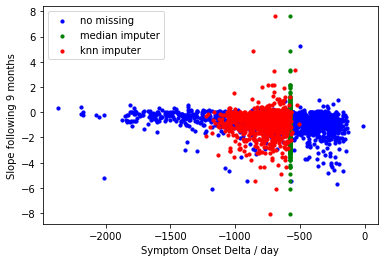

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(temp_nonna, slope_nonna, c='b', s=10, label='no missing')
plt.scatter(temp2_na, slope_na, c='g', s=10, label='median imputer')
plt.scatter(temp1_na, slope_na, c='r', s=10, label='knn imputer')
plt.xlabel('Symptom Onset Delta / day')
plt.ylabel('Slope following 9 months')
plt.legend(loc="upper left")
#plt.show()
plt.savefig('/content/drive/MyDrive/ML2021/Project/SymOnsetDelta.png')